<a href="https://colab.research.google.com/github/HanifaElahi/Mediapipe/blob/main/Selfie_Segmentation_Mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mediapipe Selfie Segmentation***

---


* MediaPipe Selfie Segmentation segments the prominent humans in the scene. It can run in real-time on both smartphones and laptops. 
* The intended use cases include selfie effects and video conferencing, where the person is close (< 2m) to the camera.


# Models

---

* Two models are there: general and landscape.
* Both models are based on MobileNetV3, with modifications to make them more efficient. 
* The general model operates on a 256x256x3 (HWC) tensor, and outputs a 256x256x1 tensor representing the segmentation mask. 
* The landscape model is similar to the general model, but operates on a 144x256x3 (HWC) tensor. It has fewer FLOPs than the general model, and therefore, runs faster. 
* Note that MediaPipe Selfie Segmentation automatically resizes the input image to the desired tensor dimension before feeding it into the ML models.



# ***Installation***

--- 

In [1]:
!pip install mediapipe

     |████████████████████████████████| 32.8 MB 1.2 MB/s 


# ***Uploading Images***

--- 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving selfie_segmentation_1.jpg to selfie_segmentation_1.jpg
Saving Selfie_segmentation_2.jpg to Selfie_segmentation_2.jpg


# ***Importing Libraries***

--- 

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

# ***Mediapipe Selfie Segmentation***

In [4]:
#setting desired width and height of images
DESIRED_HEIGHT = 360
DESIRED_WIDTH = 360

In [5]:
#function to resize and image show
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

selfie_segmentation_1.jpg


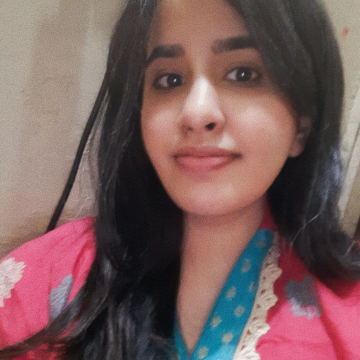

Selfie_segmentation_2.jpg


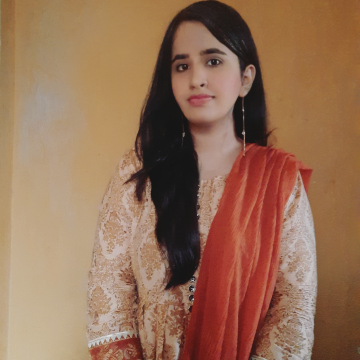

In [6]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [7]:
#initializing
import mediapipe as mp
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# ***Segmentation Masks***



---



Segmentation mask of selfie_segmentation_1.jpg:


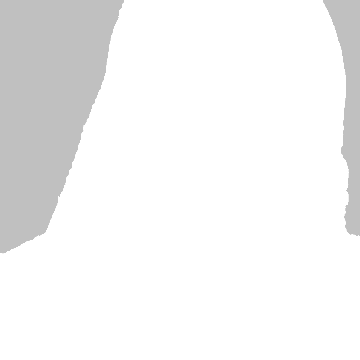

Segmentation mask of Selfie_segmentation_2.jpg:


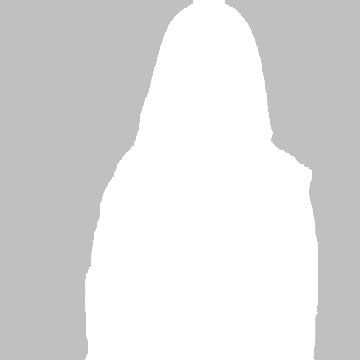

In [11]:
# Show segmentation masks.
BG_COLOR = (192, 192, 192) # gray
MASK_COLOR = (255, 255, 255) # white

with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Generate solid color images for showing the output selfie segmentation mask.
    fg_image = np.zeros(image.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOR
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.2
    output_image = np.where(condition, fg_image, bg_image)

    print(f'Segmentation mask of {name}:')
    resize_and_show(output_image)
    cv2.imwrite('segmentation_maks_' + str(name), output_image)

# ***Blurred Image Background : Segmentation Mask***

--- 

Blurred background of selfie_segmentation_1.jpg:


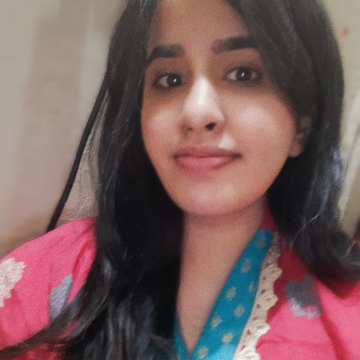

Blurred background of Selfie_segmentation_2.jpg:


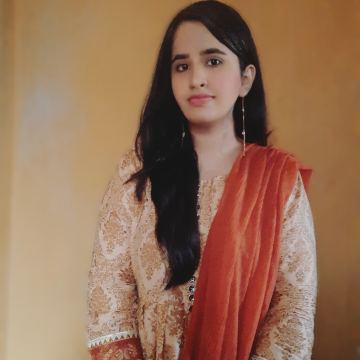

In [13]:
# Blur the image background based on the segementation mask.
with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    blurred_image = cv2.GaussianBlur(image,(55,55),0)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    output_image = np.where(condition, image, blurred_image)
    
    print(f'Blurred background of {name}:')
    resize_and_show(output_image)
    cv2.imwrite('blur_image_segmentation_maks' + str(name), output_image)

# **Source**:


---


1. https://colab.research.google.com/drive/1LwpblseHAIEPn8Ow5J-TbBUq0zgV60PV?usp=sharing#scrollTo=ua90F8d-MMYN
2. https://google.github.io/mediapipe/solutions/selfie_segmentation.html